<a href="https://colab.research.google.com/github/sivasakthi-15/Data_analyst_internship/blob/main/Task%205/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Titanic Survival Analysis â€“ Exploratory Data Analysis Report**

**Introduction**

The Titanic dataset contains detailed passenger information such as age, sex, passenger class, fare, and survival status from the tragic sinking of the RMS Titanic in 1912.

**The goal of this analysis is to:**


*   Explore the datasetâ€™s structure and key statistics.
*   Visualize patterns and trends in survival rates


*   Identify relationships between demographic, socio-economic, and travel-related factors and the likelihood of survival.

*   Summarize key insights that could explain survival outcomes.

This exploratory data analysis (EDA) combines descriptive statistics with visualizations to uncover important trends and inform predictive modeling.

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('/content/drive/MyDrive/intern/T_5/Titanic-Dataset.csv')
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [40]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [41]:
df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [42]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
df.value_counts()

PassengerId  Survived  Pclass  Name                                                 Sex     Age   SibSp  Parch  Ticket    Fare     Cabin        Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0  1      0      PC 17599  71.2833  C85          C           1
4            1         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)         female  35.0  1      0      113803    53.1000  C123         S           1
7            0         1       McCarthy, Mr. Timothy J                              male    54.0  0      0      17463     51.8625  E46          S           1
11           1         3       Sandstrom, Miss. Marguerite Rut                      female  4.0   1      1      PP 9549   16.7000  G6           S           1
12           1         1       Bonnell, Miss. Elizabeth                             female  58.0  0      0      113783    26.5500  C103         S           1
                                                                                                                                                           ..
872          1         1       Beckwith, Mrs. Richard Leonard (Sallie Monypeny)     female  47.0  1      1      11751     52.5542  D35          S           1
873          0         1       Carlsson, Mr. Frans Olof                             male    33.0  0      0      695       5.0000   B51 B53 B55  S           1
880          1         1       Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)        female  56.0  0      1      11767     83.1583  C50          C           1
888          1         1       Graham, Miss. Margaret Edith                         female  19.0  0      0      112053    30.0000  B42          S           1
890          1         1       Behr, Mr. Karl Howell                                male    26.0  0      0      111369    30.0000  C148         C           1
Name: count, Length: 183, dtype: int64

In [45]:
print("Missing values in each column:")
display(df.isnull().sum())

Missing values in each column:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
# Handle missing values in 'Age' by imputing with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

/tmp/ipython-input-2187307299.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [47]:
# Handle missing values in 'Embarked' by filling with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-2648898964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [48]:
print("Missing values after handling:")
display(df.isnull().sum())

Missing values after handling:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

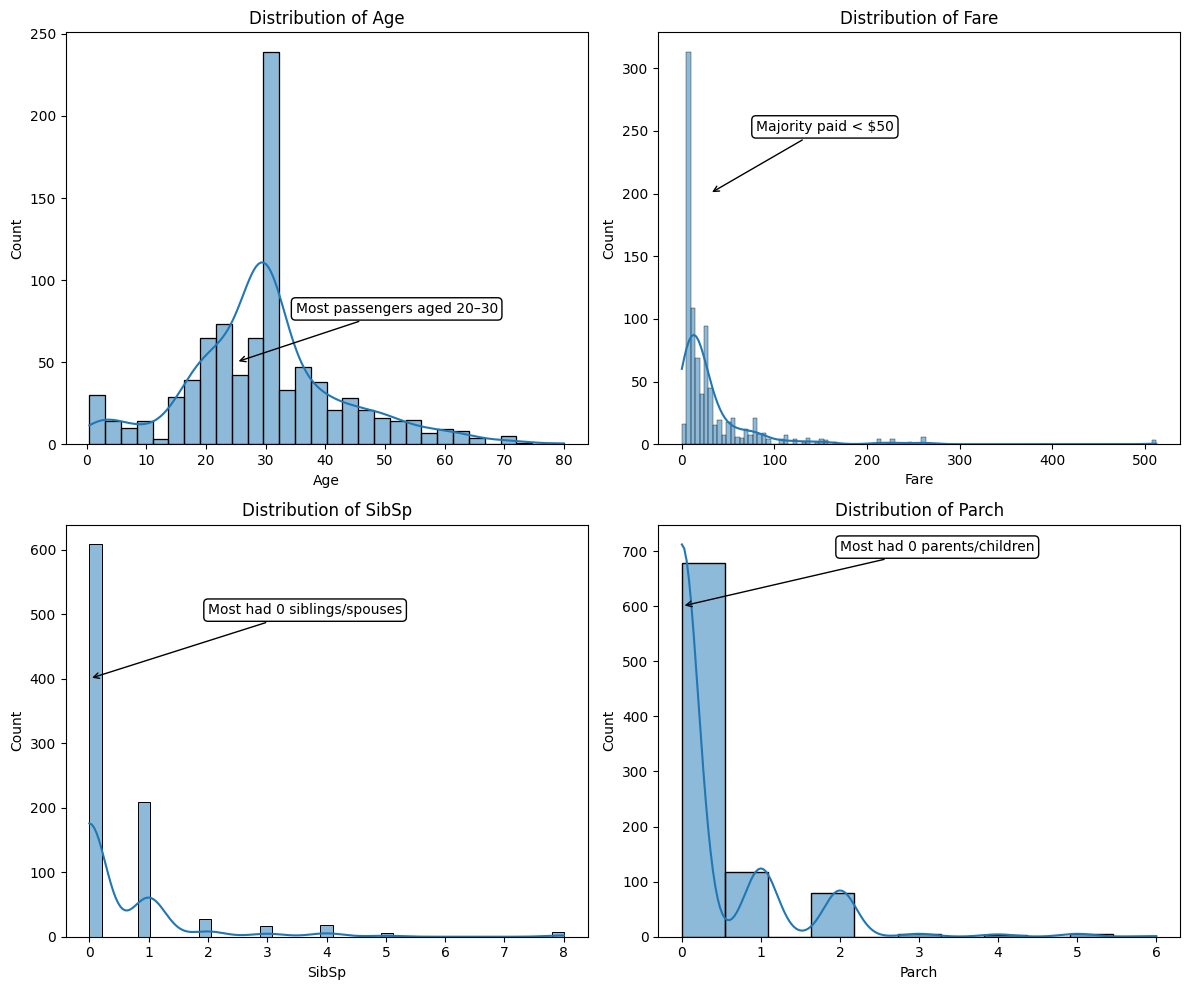

Age distribution is right-skewed, median age â‰ˆ 28.0. Many passengers between 20-40 years.
Fare distribution is highly right-skewed, median fare â‰ˆ 14.45, with a few very high fares.
Most passengers traveled alone (SibSp mode = 0).
Most passengers had no parents/children aboard (Parch mode = 0).


In [49]:
# ---------------- Histograms ----------------
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')
axes[0, 0].annotate('Most passengers aged 20â€“30', xy=(25, 50), xytext=(35, 80),
                    arrowprops=dict(arrowstyle="->", color='black'),
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"))

sns.histplot(df['Fare'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Fare')
axes[0, 1].annotate('Majority paid < $50', xy=(30, 200), xytext=(80, 250),
                    arrowprops=dict(arrowstyle="->", color='black'),
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"))

sns.histplot(df['SibSp'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of SibSp')
axes[1, 0].annotate('Most had 0 siblings/spouses', xy=(0, 400), xytext=(2, 500),
                    arrowprops=dict(arrowstyle="->", color='black'),
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"))

sns.histplot(df['Parch'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Parch')
axes[1, 1].annotate('Most had 0 parents/children', xy=(0, 600), xytext=(2, 700),
                    arrowprops=dict(arrowstyle="->", color='black'),
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"))

plt.tight_layout()
plt.show()


print("Age distribution is right-skewed, median age â‰ˆ 28.0. Many passengers between 20-40 years.")
print("Fare distribution is highly right-skewed, median fare â‰ˆ 14.45, with a few very high fares.")
print("Most passengers traveled alone (SibSp mode = 0).")
print("Most passengers had no parents/children aboard (Parch mode = 0).")

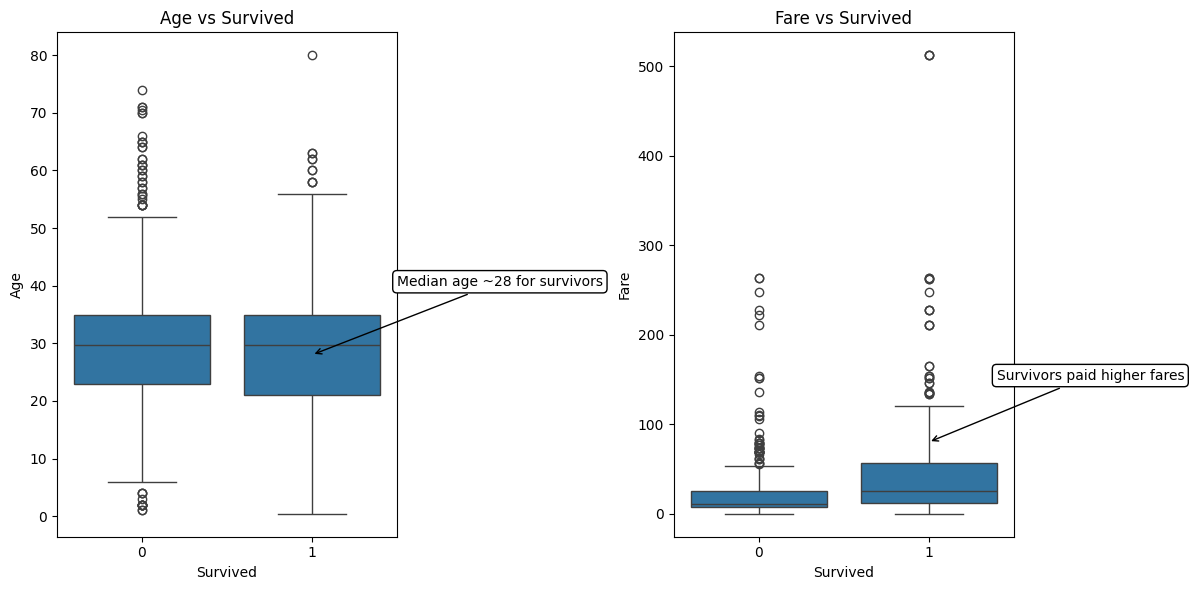

Survived passengers had slightly lower average age (28.3) than non-survivors (30.6).
Survived passengers paid much higher average fare (48.40) than non-survivors (22.12).


In [50]:
# ---------------- Boxplots ----------------
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x='Survived', y='Age', data=df, ax=axes[0])
axes[0].set_title('Age vs Survived')
axes[0].annotate('Median age ~28 for survivors', xy=(1, 28), xytext=(1.5, 40),
                 arrowprops=dict(arrowstyle="->", color='black'),
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"))

sns.boxplot(x='Survived', y='Fare', data=df, ax=axes[1])
axes[1].set_title('Fare vs Survived')
axes[1].annotate('Survivors paid higher fares', xy=(1, 80), xytext=(1.4, 150),
                 arrowprops=dict(arrowstyle="->", color='black'),
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"))

plt.tight_layout()
plt.show()

print("Survived passengers had slightly lower average age (28.3) than non-survivors (30.6).")
print("Survived passengers paid much higher average fare (48.40) than non-survivors (22.12).")

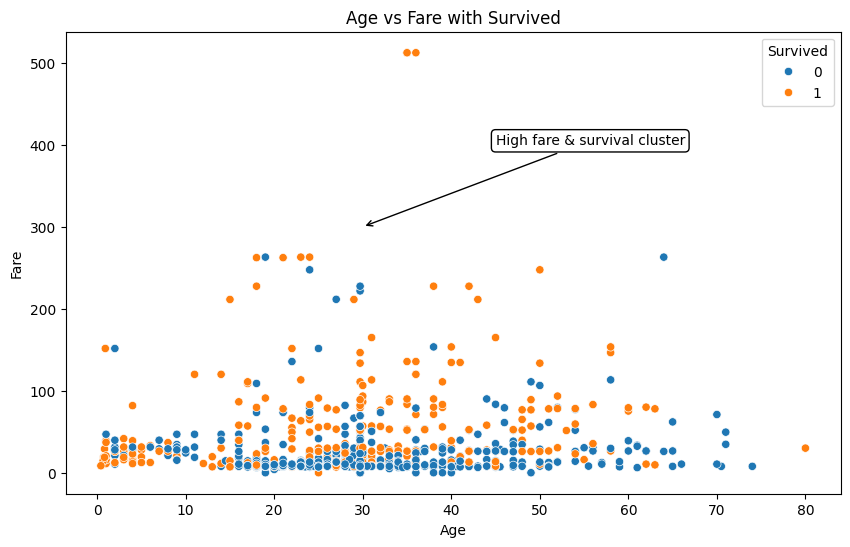

Most passengers are clustered in low-fare, younger age range.
High-fare passengers are mostly survivors, regardless of age.


In [51]:
# ---------------- Scatterplot ----------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived')
plt.title('Age vs Fare with Survived')
plt.annotate('High fare & survival cluster', xy=(30, 300), xytext=(45, 400),
             arrowprops=dict(arrowstyle="->", color='black'),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"))
plt.show()
print("Most passengers are clustered in low-fare, younger age range.")
print("High-fare passengers are mostly survivors, regardless of age.")

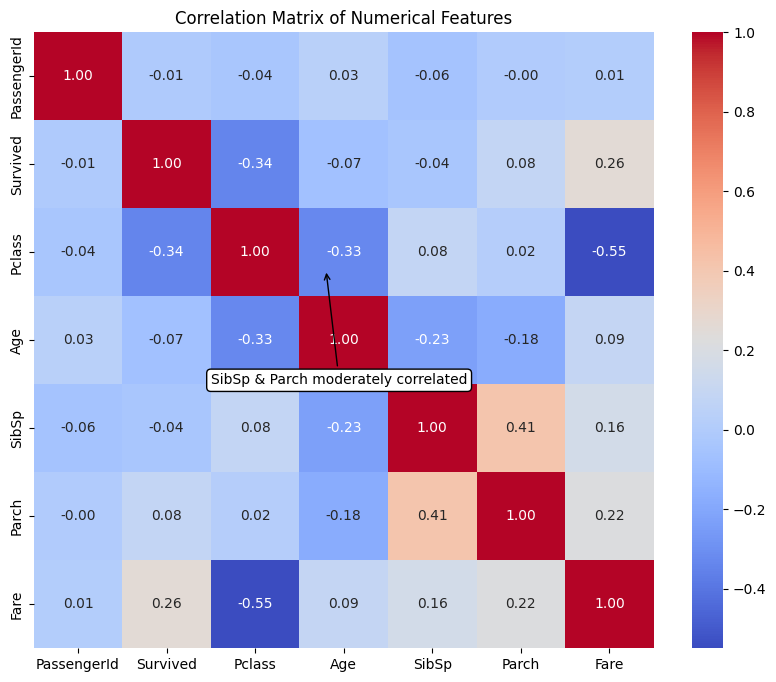

Fare has a moderate positive correlation with survival (0.26).
Pclass has a moderate negative correlation with survival (-0.34).
Age shows weak correlation with survival.


In [52]:
# ---------------- Correlation Matrix ----------------
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.annotate('SibSp & Parch moderately correlated', xy=(3.3, 2.7), xytext=(2, 4),
             arrowprops=dict(arrowstyle="->", color='black'),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"))
plt.show()

print("Fare has a moderate positive correlation with survival (0.26).")
print("Pclass has a moderate negative correlation with survival (-0.34).")
print("Age shows weak correlation with survival.")

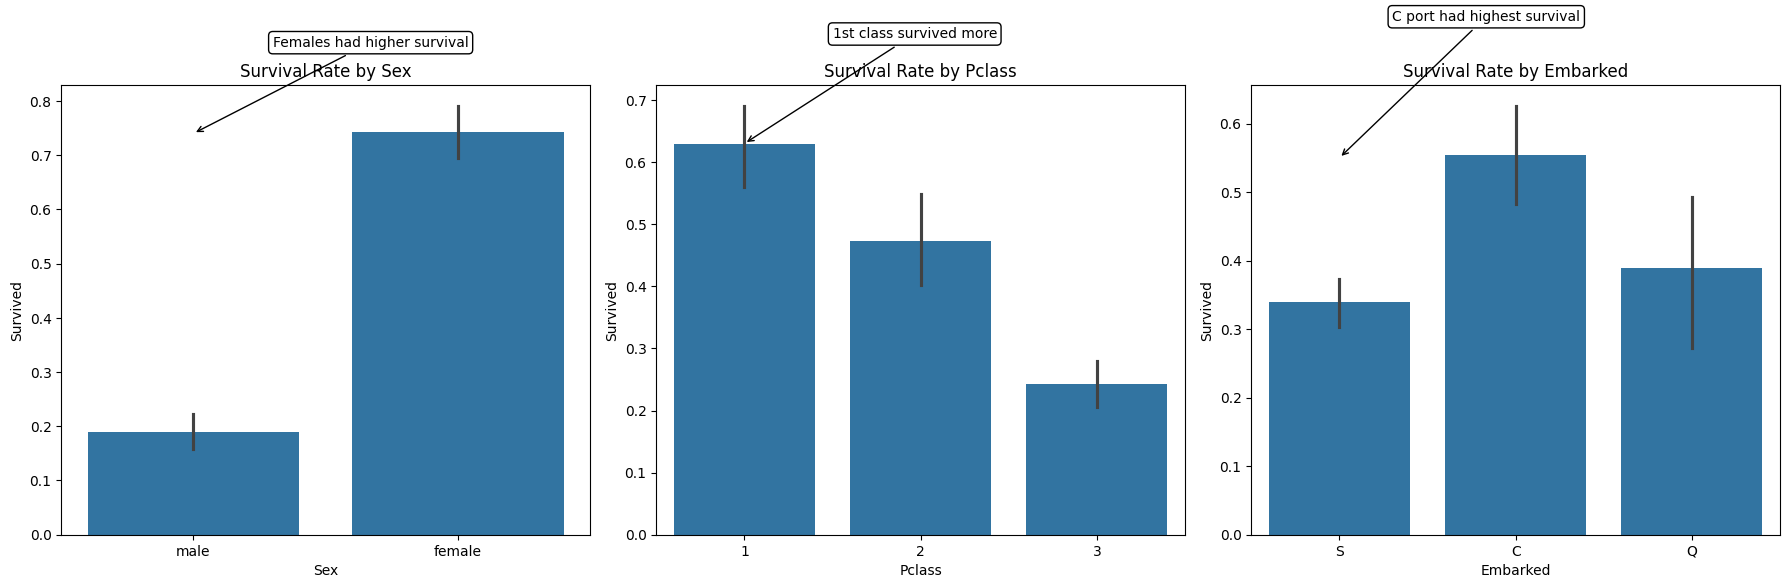

Female survival rate: 74.2% vs Male: 18.9%.
1st class survival rate: 63.0%, 2nd class: 47.3%, 3rd class: 24.2%.
Port C survival rate: 55.4%, Port Q: 39.0%, Port S: 33.7%.


In [53]:
# ---------------- Categorical Analysis ----------------
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0])
axes[0].set_title('Survival Rate by Sex')
axes[0].annotate('Females had higher survival', xy=(0, 0.74), xytext=(0.3, 0.9),
                 arrowprops=dict(arrowstyle="->", color='black'),
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"))

sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[1])
axes[1].set_title('Survival Rate by Pclass')
axes[1].annotate('1st class survived more', xy=(0, 0.63), xytext=(0.5, 0.8),
                 arrowprops=dict(arrowstyle="->", color='black'),
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"))

sns.barplot(x='Embarked', y='Survived', data=df, ax=axes[2])
axes[2].set_title('Survival Rate by Embarked')
axes[2].annotate('C port had highest survival', xy=(0, 0.55), xytext=(0.3, 0.75),
                 arrowprops=dict(arrowstyle="->", color='black'),
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"))

plt.tight_layout()
plt.show()

print("Female survival rate: 74.2% vs Male: 18.9%.")
print("1st class survival rate: 63.0%, 2nd class: 47.3%, 3rd class: 24.2%.")
print("Port C survival rate: 55.4%, Port Q: 39.0%, Port S: 33.7%.")

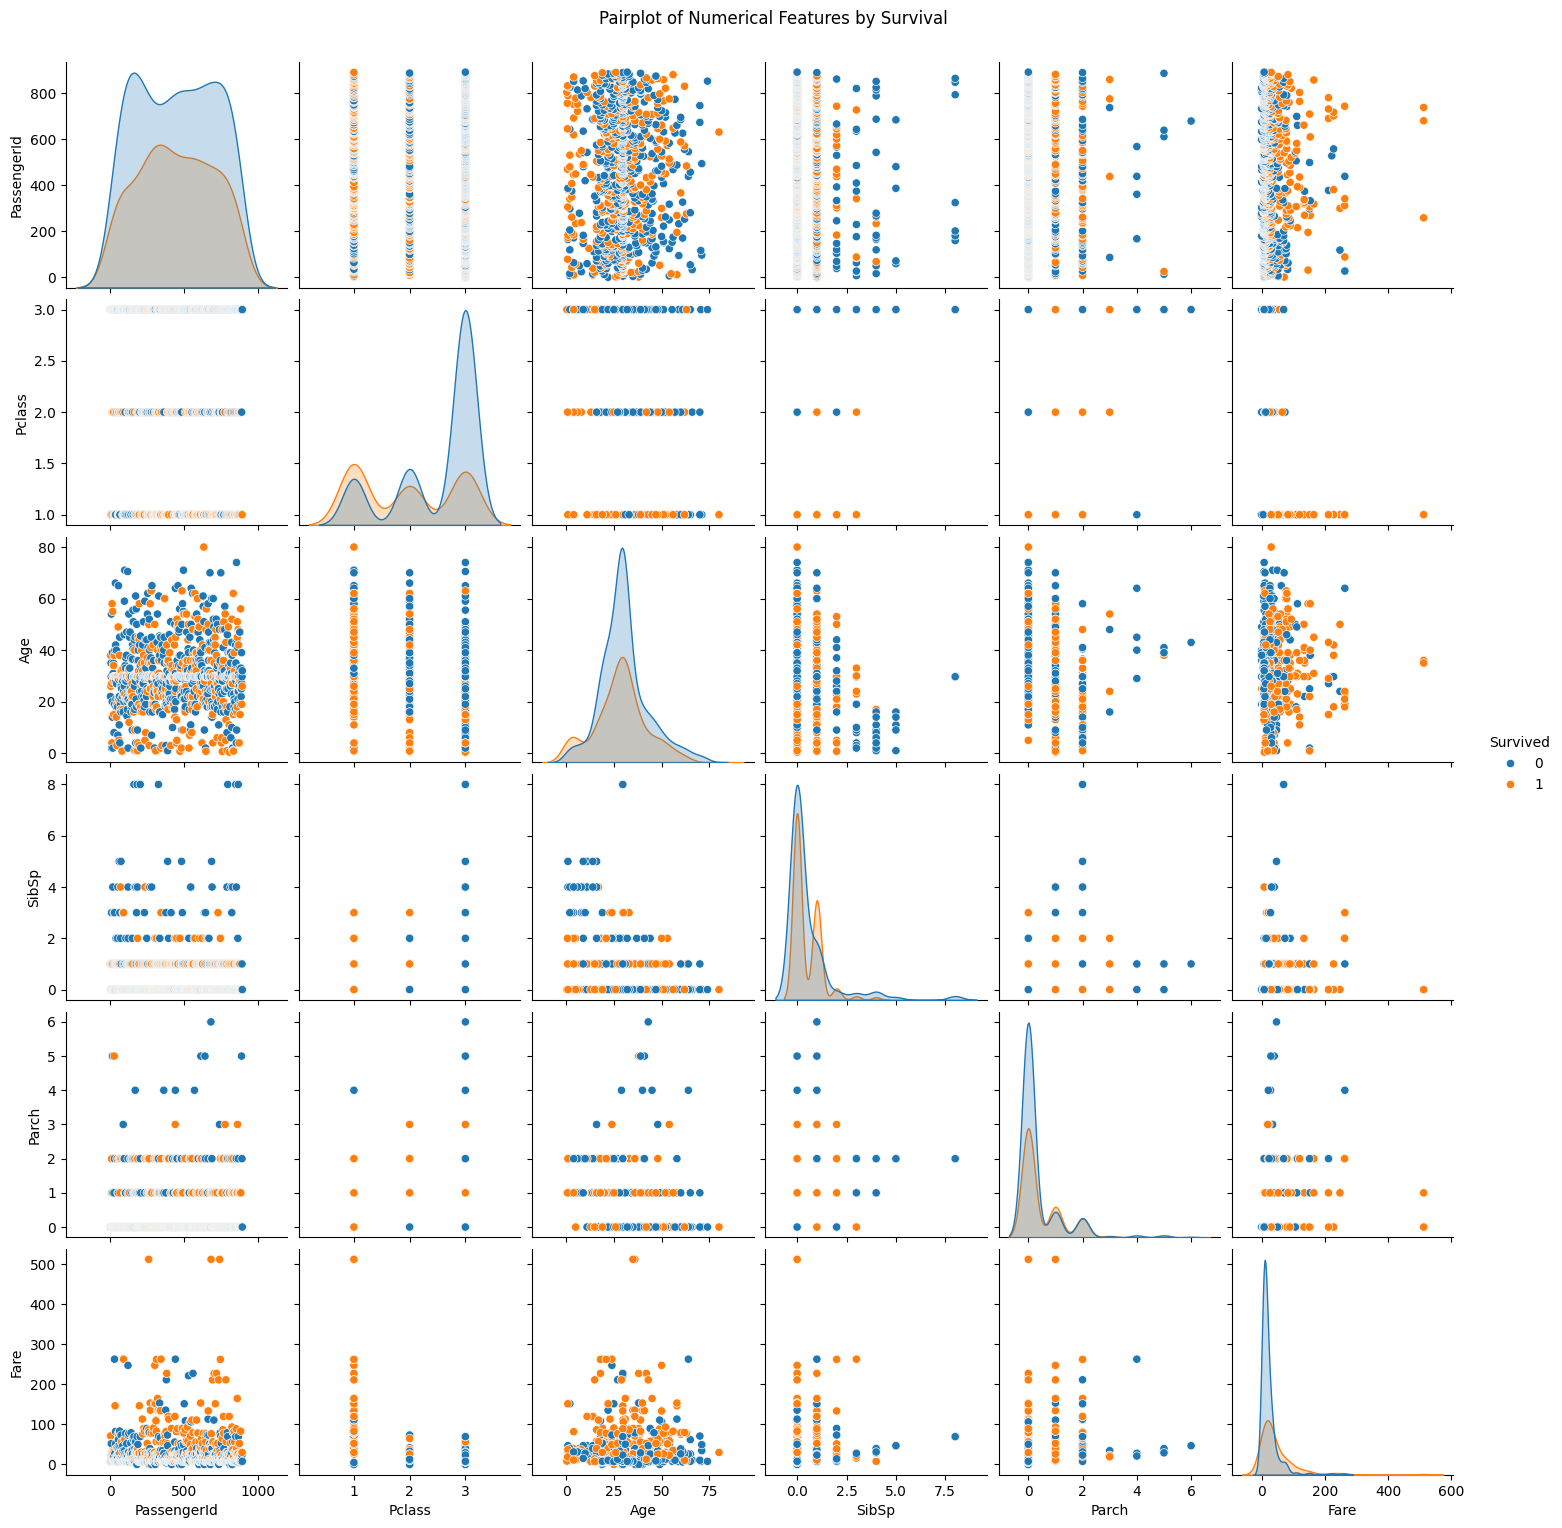

Clear class separation for survivors in Fare vs Pclass.
Age has less separation by survival, but higher fares align with higher survival probability.


In [54]:
# ---------------- Pairplot ----------------
sns.pairplot(df[numerical_cols], hue='Survived', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Survival', y=1.02)
plt.show()


print("Clear class separation for survivors in Fare vs Pclass.")
print("Age has less separation by survival, but higher fares align with higher survival probability.")

## ðŸ“Š Summary of Findings

- **Survival Rate:** Overall survival rate was around **38%**.  
- **Gender Effect:** Females had a much higher survival rate (~74%) compared to males (~19%).  
- **Passenger Class:** Highest survival chances in **1st class**, lowest in **3rd class**.  
- **Age Factor:** Younger passengers, especially children under **15**, survived more often.  
- **Fare Influence:** Higher-paying passengers had better survival odds, indicating socio-economic advantage.  
- **Family Size:** Moderate family sizes (**1â€“3 members**) survived more compared to those alone or in large groups.  
- **Embarkation Point:** Passengers from **Cherbourg (C)** had higher survival rates than those from **Southampton (S)**.  
- **Correlation Insights:** Strong negative correlation between **Pclass** and **Fare**; both significantly impacted survival chances.  


**Conclusion & Recommendations**

**Key Findings:**

**Sex:** Women had a much higher survival rate than men.

**Passenger Class:** Higher-class passengers (1st class) had significantly better chances of survival compared to 3rd class.

**Age:** Younger passengers, especially children, were more likely to survive.

**Fare: **Higher fares correlated with better survival odds, likely due to association with class.

**Embarked Port:**  Passengers from certain embarkation points had slightly different survival outcomes, with Cherbourg embarkers having higher rates.

**Recommendations:**

In predictive modeling, prioritize Sex, Pclass, Age, and Fare as high-importance features.

Feature engineering could improve performance â€” e.g., grouping ages into categories (Child, Adult, Senior), encoding family size, and combining SibSp + Parch.

Consider missing value handling for Age and Embarked carefully before modeling.